In [1]:
from mxnet import np, npx, autograd
from d2l import mxnet as d2l
from IPython import display
from pdb import set_trace
npx.set_np()

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
n = 5
batch = next(iter(train_iter))
imgs = batch[0][:n]
titles = d2l.get_fashion_mnist_labels(batch[1][:n].tolist())

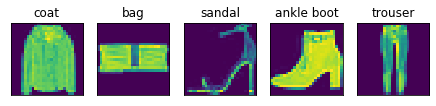

In [4]:
d2l.show_images(np.reshape(imgs, (n, 28, 28)), 1, n, titles=titles);

## Define weights and bias

In [5]:
num_inputs = 28*28
num_classes = 10
W = np.random.normal(0, 0.01, size=(num_inputs, num_classes))
b = np.zeros(num_classes)
#b = np.random.normal(size=num_classes)
W.attach_grad()
b.attach_grad()

## Define Updated Iterator

In [6]:
def reshaped_iter(orig_iter, test=False):
    num_iter = 0
    for X, y in iter(orig_iter):
        if test and num_iter >= 5:
            break
        yield np.reshape(X.squeeze(), (-1, num_inputs)), y
        num_iter += 1

## Define Softmax

In [7]:
def softmax(y):
    return np.exp(y)/np.sum(np.exp(y), axis=1, keepdims=True)

## Define Architecture

In [8]:
def net(X, W, b):
    return softmax(np.dot(X, W) + b)

## Define Loss

In [9]:
def ce_loss(y, yhat):
    n_samples = y.shape[0]
    cross_entropy = -np.log(yhat[range(n_samples), y])
    return cross_entropy.mean()

## Define SGD

In [10]:
def sgd(params, lr):
    param_num = 0
    for param in params:
        #set_trace()
        before_update_mean = param.mean()
        param[:] = param - lr*param.grad
        after_update_mean = param.mean()
        if param_num == 2:
            print(f'Before update: {before_update_mean}, After update: {after_update_mean}')
        param_num += 1
    return params

## Define Optimization Loop

In [11]:
num_epochs = 10
lr = 0.1
for epoch in range(num_epochs):
    for X, y in reshaped_iter(train_iter, False):
        with autograd.record():
            yhat = net(X, W, b)
            loss = ce_loss(y, yhat)
        loss.backward()
        sgd([W, b], lr)
    print(f'Epoch: {epoch}, Loss is: {loss.item()}')

Epoch: 0, Loss is: 0.6474671959877014
Epoch: 1, Loss is: 0.5483354926109314
Epoch: 2, Loss is: 0.4961611032485962
Epoch: 3, Loss is: 0.493145614862442
Epoch: 4, Loss is: 0.6341699957847595
Epoch: 5, Loss is: 0.44063806533813477
Epoch: 6, Loss is: 0.5266610980033875
Epoch: 7, Loss is: 0.5517476797103882
Epoch: 8, Loss is: 0.49957799911499023
Epoch: 9, Loss is: 0.39251962304115295


## Sample Predictions

In [12]:
n = 5
#ri = reshaped_iter(test_iter, False)
batch = next(ri)
imgs = batch[0][:n]
labels = batch[1][:n]
preds = np.argmax(net(imgs, W, b), axis=1).astype('int32')
titles = d2l.get_fashion_mnist_labels(preds.tolist())

NameError: name 'ri' is not defined

In [ ]:
d2l.show_images(np.reshape(imgs, (n, 28, 28)), 1, n, titles=titles);

## Calculate Accuracy

In [ ]:
correct = 0
total = 0
for X, y in reshaped_iter(test_iter, False):
    preds = np.argmax(net(X, W, b), axis=1).astype('int32')
    correct += (preds == y).sum().item()
    total += X.shape[0]

In [ ]:
correct/total